In [1]:
!pip install flax

In [14]:
from jax import numpy as jnp, random, grad, jit, tree_map
import flax.linen as nn
from jax.typing import ArrayLike
from typing import Iterable, Callable
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

plt.style.use("seaborn")

<ipython-input-14-285e8bb9acf4>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [10]:
X, y = make_circles(n_samples=10_000, noise=0.1, random_state=0, factor=0.4)
X = jnp.array(X)
y = jnp.array(y).reshape(-1, 1)

[Text(0.5, 0, '$x_1$'), Text(0, 0.5, '$x_2$')]

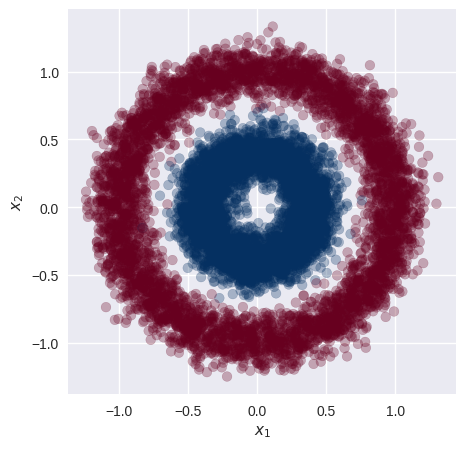

In [12]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.3, cmap="RdBu")
ax.set(xlabel="$x_1$", ylabel="$x_2$")

In [15]:
nn.Dense?

In [25]:
class Pollito:
    def __init__(self, color: str):
        self.color = color

    def get_color(self) -> str:
        return self.color

In [26]:
pio = Pollito(color="amarillo")
pio.get_color()

'amarillo'

In [32]:
class MLP(nn.Module):
    n_units: Iterable[int]
    activations: Iterable[Callable]

    def setup(self):
        self.layers = [
            nn.Dense(features=unit)
            for unit in self.n_units
        ]

    def __call__(self, x: ArrayLike) -> ArrayLike:
        h = x
        for layer, activation in zip(self.layers, self.activations):
            h = activation(layer(h))
        return h

In [33]:
model = MLP(
    n_units = [4, 4, 1],
    activations = [nn.sigmoid, nn.sigmoid, nn.sigmoid]
)

In [34]:
model

MLP(
    # attributes
    n_units = [4, 4, 1]
    activations = [<PjitFunction of <function sigmoid at 0x7b74a182b910>>, <PjitFunction of <function sigmoid at 0x7b74a182b910>>, <PjitFunction of <function sigmoid at 0x7b74a182b910>>]
)

In [35]:
key = random.PRNGKey(1)

In [51]:
print(model.tabulate(key, X[:10]))


                                MLP Summary                                 
┏━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ path     ┃ module ┃ inputs        ┃ outputs       ┃ params               ┃
┡━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│          │ MLP    │ float32[10,2] │ float32[10,1] │                      │
├──────────┼────────┼───────────────┼───────────────┼──────────────────────┤
│ layers_0 │ Dense  │ float32[10,2] │ float32[10,4] │ bias: float32[4]     │
│          │        │               │               │ kernel: float32[2,4] │
│          │        │               │               │                      │
│          │        │               │               │ 12 (48 B)            │
├──────────┼────────┼───────────────┼───────────────┼──────────────────────┤
│ layers_1 │ Dense  │ float32[10,4] │ float32[10,4] │ bias: float32[4]     │
│          │        │               │               │ kernel: float32[4,4] 

In [52]:
X.shape

(10000, 2)

In [53]:
params = model.init(key, X[:32])

In [54]:
y_pred = model.apply(params, X)

In [55]:
y_pred.shape

(10000, 1)

In [56]:
y_pred

Array([[0.6741777],
       [0.6845612],
       [0.6967898],
       ...,
       [0.6833195],
       [0.6759947],
       [0.6913754]], dtype=float32)